# **Foreign Direct Investment Analysis**
Analysis By: **Dipean Dasgupta**<br>
UNID: **UMIP4841**

**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

**Connecting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DS=pd.read_csv('/content/drive/MyDrive/UM_Projects_data/FDI data.csv')

In [ ]:
DS.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


**Data Cleaning and Preparation**

In [ ]:
Nullcheck=DS.isnull().sum()
Nullcheck

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [ ]:
DS.describe()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,37.757302,63.931587,42.925714,34.727778,51.090317,87.932540,198.281905,390.085714,498.348571,410.069524,339.413810,557.472698,355.930000,385.703492,490.959841,634.936349,690.131111
std,112.227860,157.878737,86.606439,67.653735,101.934873,206.436967,686.783115,1026.249935,1134.649040,926.814626,627.141139,1031.474056,778.091368,658.429944,837.787060,1335.307706,1411.965354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.215000,0.715000,1.230000,4.160000,9.950000,11.950000,7.880000,8.430000,22.720000,15.115000,16.610000,33.800000,30.000000,19.905000
50%,4.030000,5.070000,11.010000,6.370000,9.090000,22.620000,25.820000,58.820000,84.880000,69.740000,58.070000,129.360000,95.410000,113.780000,177.220000,159.130000,110.860000
75%,23.510000,44.830000,36.555000,38.660000,43.205000,63.855000,108.325000,279.270000,383.320000,341.595000,304.280000,593.525000,288.025000,473.060000,595.390000,519.070000,741.220000
max,832.070000,873.230000,419.960000,368.320000,527.900000,1359.970000,4713.780000,6986.170000,6183.490000,5466.130000,3296.090000,5215.980000,4832.980000,3982.890000,4443.260000,6889.460000,8684.070000


In [ ]:
row_rename_dict = {
    'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)': 'SERVICES',
    'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects': 'CONSTRUCTION DEVELOPMENT',
    'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)':'TEA AND COFFEE',
    'PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY)': 'BOOK PRINTING',
    'PAPER AND PULP (INCLUDING PAPER PRODUCTS)': 'PAPER AND PULP',
    'INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)' : 'INFORMATION AND BROADCASTING',
    'PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)' : 'PRIME MOVER',
    'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS':'MATHEMATICAL SURVEY INSTRUMENTS'
}

DS['Sector'] = DS['Sector'].replace(row_rename_dict)


In [ ]:
DS.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

**EDA**

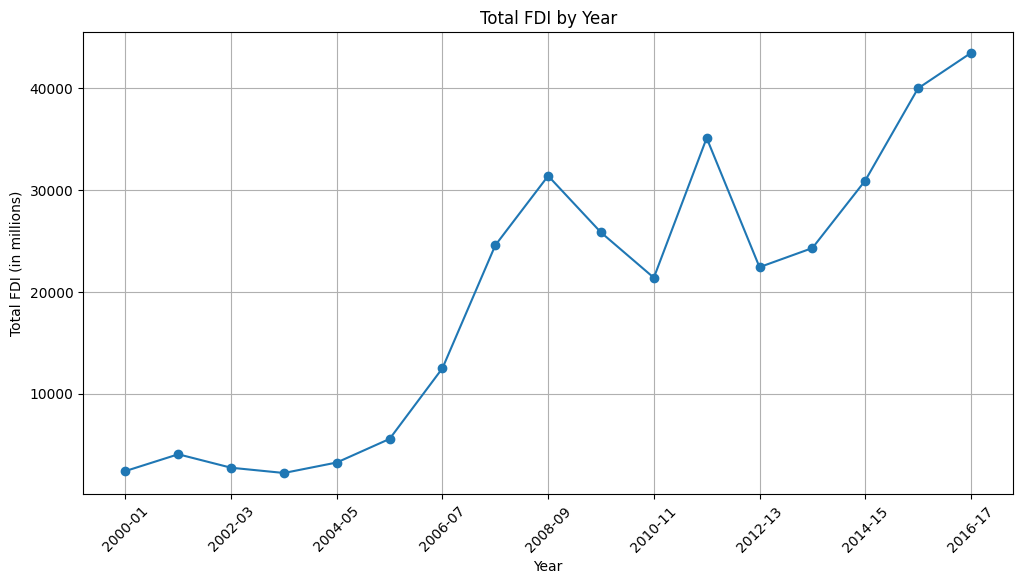

In [ ]:
#Total FDI for each year
TFDI_Y = DS.drop(columns='Sector').sum()

# Plotting the total FDI over the years
plt.figure(figsize=(12, 6))
TFDI_Y.plot(kind='line', marker='o')
plt.title('Total FDI by Year')
plt.xlabel('Year')
plt.ylabel('Total FDI (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Printing the total FDI values for each year
print("Total FDI for each year:")
print(TFDI_Y)

Total FDI for each year:
2000-01     2378.71
2001-02     4027.69
2002-03     2704.32
2003-04     2187.85
2004-05     3218.69
2005-06     5539.75
2006-07    12491.76
2007-08    24575.40
2008-09    31395.96
2009-10    25834.38
2010-11    21383.07
2011-12    35120.78
2012-13    22423.59
2013-14    24299.32
2014-15    30930.47
2015-16    40000.99
2016-17    43478.26
dtype: float64


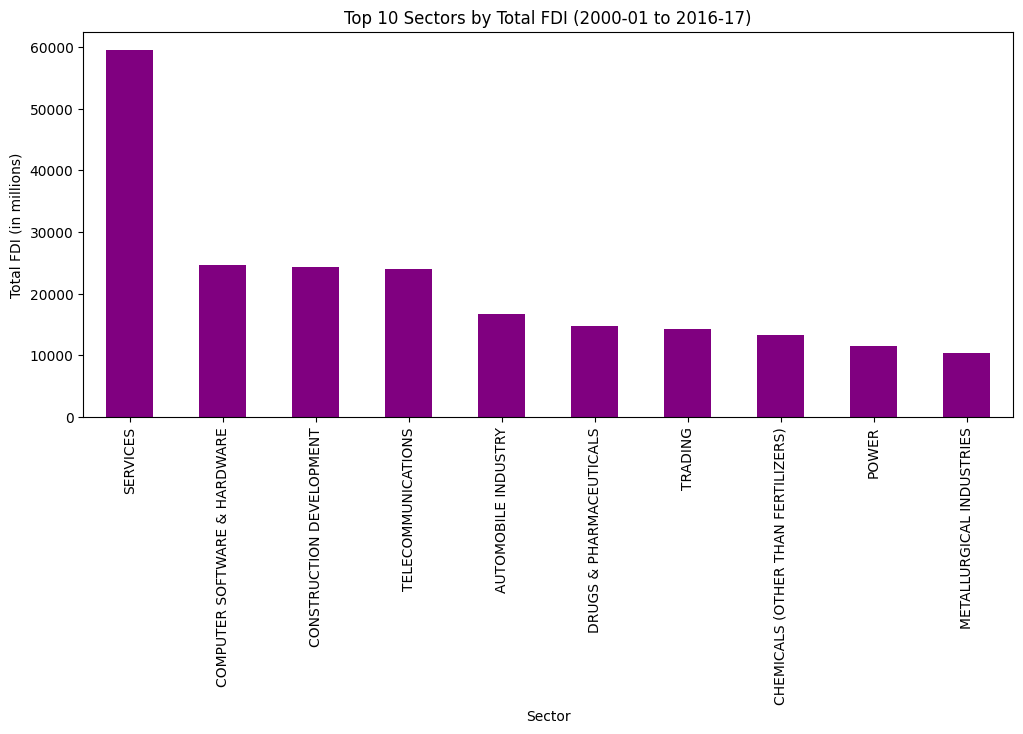

In [ ]:
# Calculating total FDI by sector over the entire period
TFID_S = DS.set_index('Sector').sum(axis=1).sort_values(ascending=False)

# Plotting the top 10 sectors by total FDI
top_10_sectors = TFID_S.head(10)
plt.figure(figsize=(12, 5))
top_10_sectors.plot(kind='bar', color='purple')
plt.title('Top 10 Sectors by Total FDI (2000-01 to 2016-17)')
plt.xlabel('Sector')
plt.ylabel('Total FDI (in millions)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(top_10_sectors)

Sector
SERVICES                              59476.49
COMPUTER SOFTWARE & HARDWARE          24669.49
CONSTRUCTION DEVELOPMENT              24293.09
TELECOMMUNICATIONS                    23946.01
AUTOMOBILE INDUSTRY                   16673.92
DRUGS & PHARMACEUTICALS               14706.90
TRADING                               14210.88
CHEMICALS (OTHER THAN FERTILIZERS)    13293.09
POWER                                 11589.13
METALLURGICAL INDUSTRIES              10330.54
dtype: float64


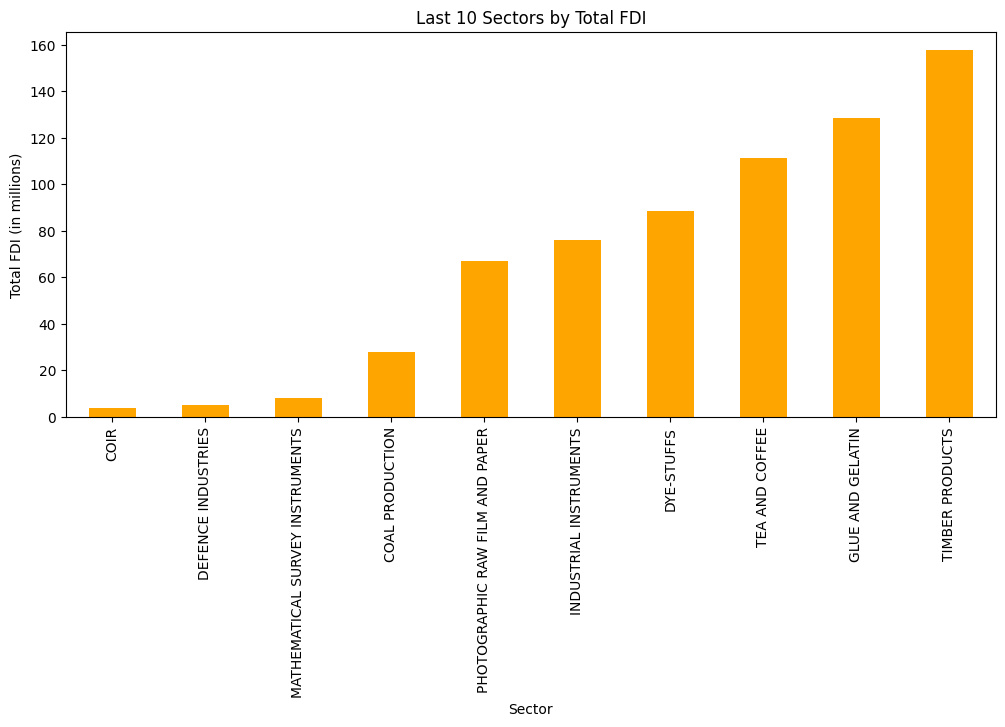

In [ ]:
# Calculating total FDI by sector over the entire period
TFID_SA = DS.set_index('Sector').sum(axis=1).sort_values(ascending=True)

# Plotting the last 10 sectors by total FDI
last_10_sectors = TFID_SA.head(10)
plt.figure(figsize=(12, 5))
last_10_sectors.plot(kind='bar', color='orange')
plt.title('Last 10 Sectors by Total FDI')
plt.xlabel('Sector')
plt.ylabel('Total FDI (in millions)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(last_10_sectors)

Sector
COIR                                 4.06
DEFENCE INDUSTRIES                   5.12
MATHEMATICAL SURVEY INSTRUMENTS      7.98
COAL PRODUCTION                     27.74
PHOTOGRAPHIC RAW FILM AND PAPER     67.28
INDUSTRIAL INSTRUMENTS              76.12
DYE-STUFFS                          88.40
TEA AND COFFEE                     111.22
GLUE AND GELATIN                   128.39
TIMBER PRODUCTS                    157.68
dtype: float64


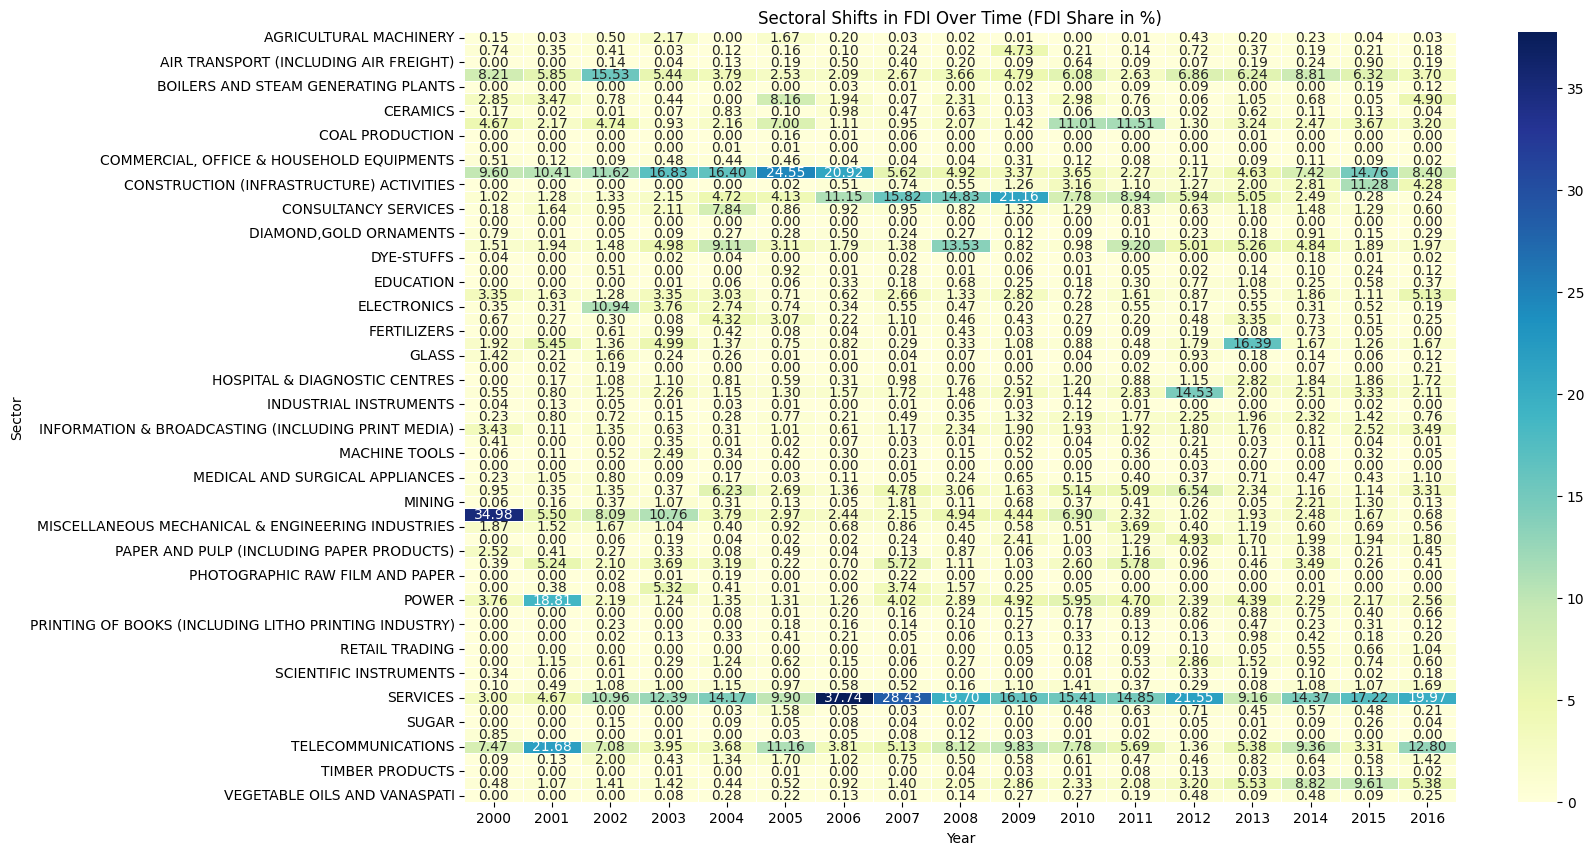

In [ ]:
#Sectoral Shifts
fdi_l = pd.melt(DS, id_vars='Sector', var_name='Year', value_name='FDI')
fdi_l['Year'] = fdi_l['Year'].str.split('-').str[0].astype(int)

# Calculating total FDI per year
total_fdi_per_year = fdi_l.groupby('Year')['FDI'].sum().reset_index(name='Total_FDI')
fdi_ln = fdi_l.merge(total_fdi_per_year, on='Year')

# Calculating FDI share per sector per year
fdi_ln['FDI_Share'] = fdi_ln['FDI'] / fdi_ln['Total_FDI'] * 100

fdi_pivot = fdi_ln.pivot(index='Sector', columns='Year', values='FDI_Share')

# Plotting heatmap to visualize sectoral shifts
plt.figure(figsize=(16, 10))
sns.heatmap(fdi_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Sectoral Shifts in FDI Over Time (FDI Share in %)')
plt.xlabel('Year')
plt.ylabel('Sector')
plt.show()

In [ ]:
# Calculating change in FDI share between start and end year for each sector
fdi_shift = fdi_pivot.loc[:, [fdi_pivot.columns.min(), fdi_pivot.columns.max()]].dropna()
fdi_shift['Change'] = fdi_shift.iloc[:, 1] - fdi_shift.iloc[:, 0]
fdi_shift = fdi_shift.sort_values(by='Change', ascending=False)

# Displaying sectors with significant shifts
print("Sectors with significant increases in FDI share:")
print(fdi_shift.head())

print("\nSectors with significant decreases in FDI share:")
print(fdi_shift.tail())

Sectors with significant increases in FDI share:
Year                                          2000       2016     Change
Sector                                                                  
SERVICES                                  3.000786  19.973361  16.972575
TELECOMMUNICATIONS                        7.470015  12.796487   5.326472
TRADING                                   0.483035   5.378320   4.895285
CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES  0.000000   4.279679   4.279679
METALLURGICAL INDUSTRIES                  0.953878   3.312414   2.358536

Sectors with significant decreases in FDI share:
Year                                                    2000      2016  \
Sector                                                                   
MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES   1.870762  0.564052   
CHEMICALS (OTHER THAN FERTILIZERS)                  4.672280  3.203440   
PAPER AND PULP (INCLUDING PAPER PRODUCTS)           2.524057  0.454503   
AUTOMOBILE INDUSTRY 

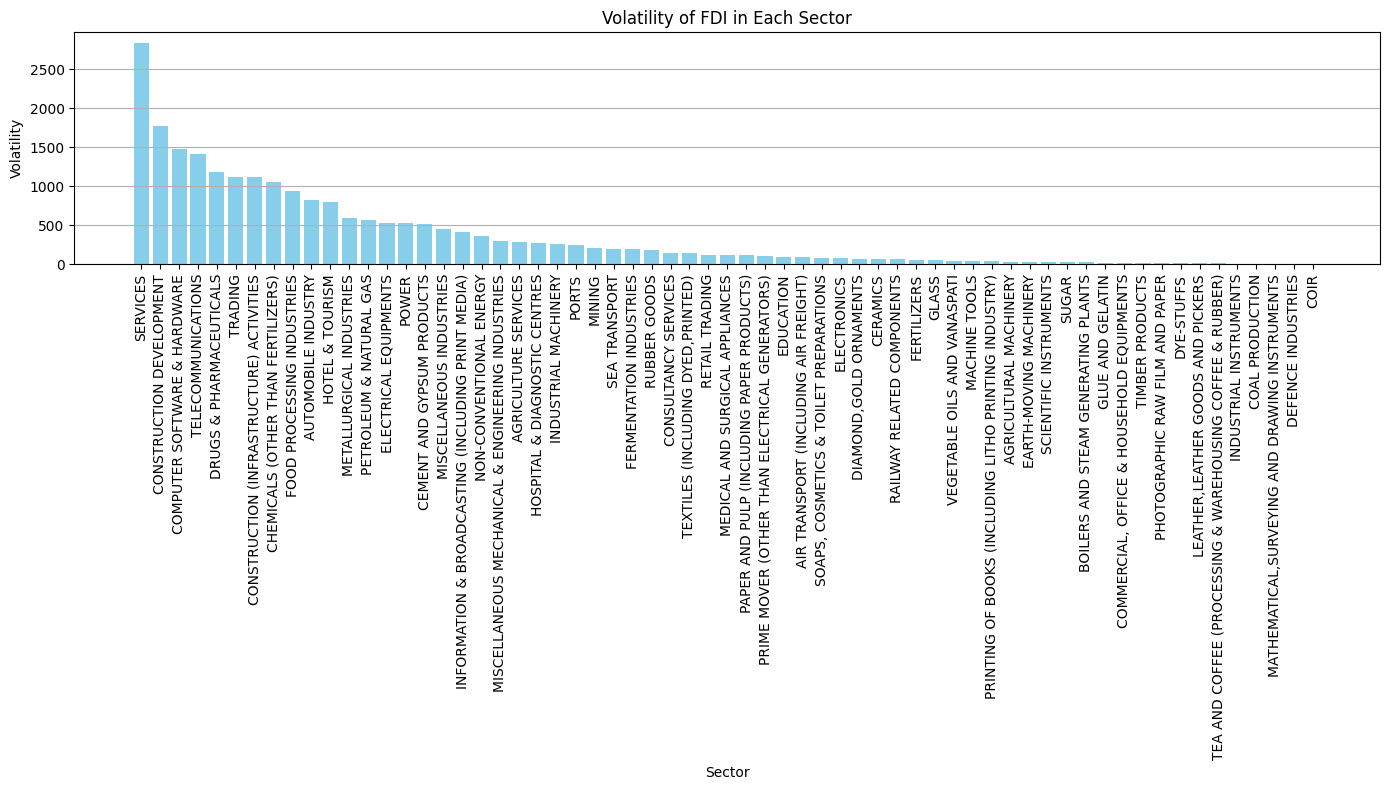

In [ ]:
yrs = DS.columns[1:]
# Calculating the standard deviation for each sector
DS['Volatility'] = DS[yrs].std(axis=1)
# Sorting by volatility
fdi_data_sorted = DS.sort_values(by='Volatility', ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(fdi_data_sorted['Sector'], fdi_data_sorted['Volatility'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Volatility')
plt.title('Volatility of FDI in Each Sector')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print(fdi_data_sorted[['Sector', 'Volatility']])

                                            Sector   Volatility
49                                        SERVICES  2831.889810
61                        CONSTRUCTION DEVELOPMENT  1776.831403
9                     COMPUTER SOFTWARE & HARDWARE  1476.671248
11                              TELECOMMUNICATIONS  1412.295111
32                         DRUGS & PHARMACEUTICALS  1188.423119
..                                             ...          ...
25                          INDUSTRIAL INSTRUMENTS     6.980444
4                                  COAL PRODUCTION     3.929237
27  MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS     1.637282
47                              DEFENCE INDUSTRIES     0.891382
59                                            COIR     0.365699

[63 rows x 2 columns]


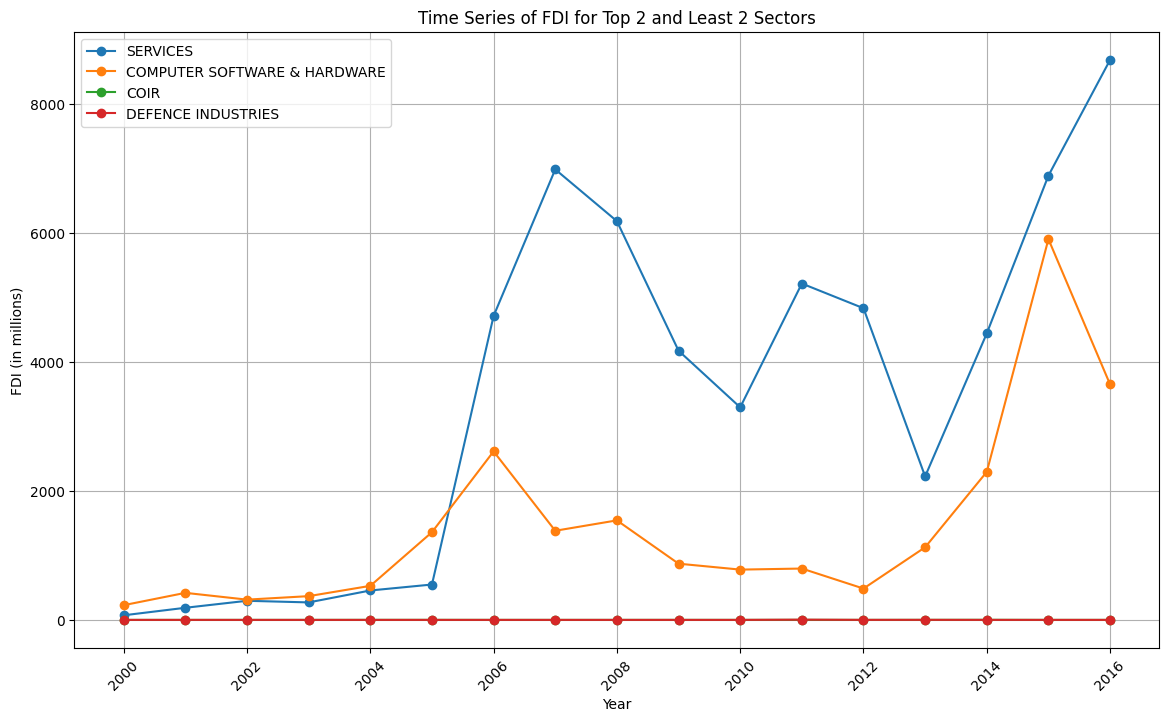

In [ ]:
TFDIS = DS.set_index('Sector').sum(axis=1)
#The top 2 and least 2 sectors
top_2 = TFDIS.nlargest(2).index
least_2 = TFDIS.nsmallest(2).index
# Combining top 2 and least 2 sectors
selected_sectors = list(top_2) + list(least_2)
# Extracting data for the selected sectors
selected_data = DS[DS['Sector'].isin(selected_sectors)].set_index('Sector').T
selected_data.index = selected_data.index.str.split('-').str[0].astype(int)

# Plotting the time series
plt.figure(figsize=(14, 8))
for sector in selected_sectors:
    plt.plot(selected_data.index, selected_data[sector], marker='o', label=sector)

# Plotting
plt.title('Time Series of FDI for Top 2 and Least 2 Sectors')
plt.xlabel('Year')
plt.ylabel('FDI (in millions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Forecasting for sector: SERVICES


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

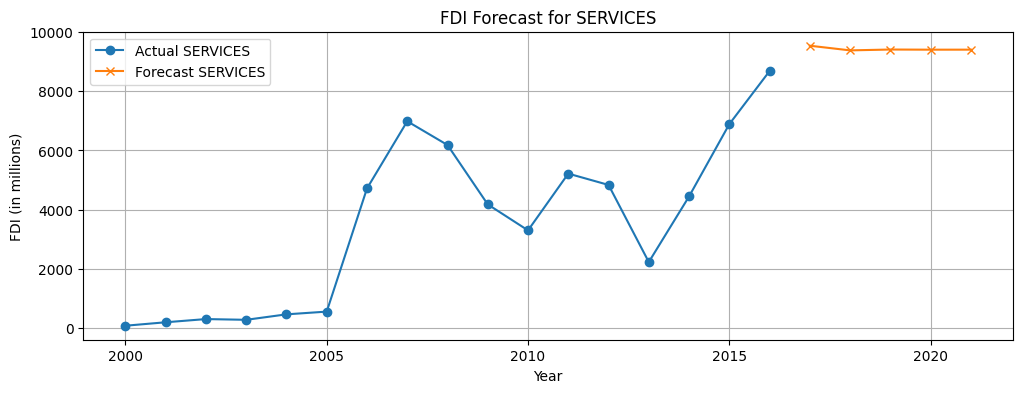

Forecasting for sector: COMPUTER SOFTWARE & HARDWARE


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

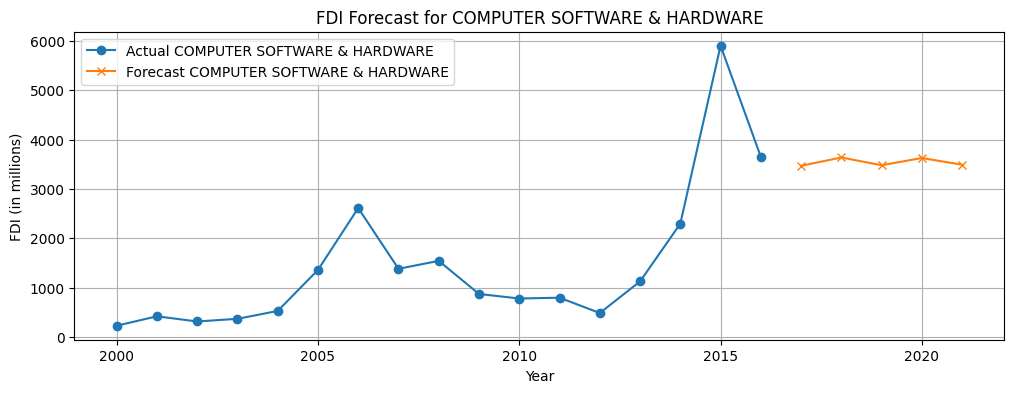

In [ ]:
sel_data = DS[DS['Sector'].isin(top_2)].set_index('Sector').T
sel_data.index = sel_data.index.str.split('-').str[0].astype(int)

def forecast_arima(time_series, forecast_periods=5, sector_name=''):
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()
    # Forecast future values
    forecast = model_fit.forecast(steps=forecast_periods)
    forecast_years = [time_series.index[-1] + i for i in range(1, forecast_periods + 1)]

    # Plotting actual and forecasted values
    plt.figure(figsize=(12, 4))
    plt.plot(time_series.index, time_series, label=f'Actual {sector_name}', marker='o')
    plt.plot(forecast_years, forecast, label=f'Forecast {sector_name}', marker='x')
    plt.title(f'FDI Forecast for {sector_name}')
    plt.xlabel('Year')
    plt.ylabel('FDI (in millions)')
    plt.legend()
    plt.grid(True)
    plt.show()
    return forecast
# Forecast for each top sector
for sector in top_2:
    time_series = selected_data[sector].dropna()
    print(f'Forecasting for sector: {sector}')
    forecast_arima(time_series, forecast_periods=5, sector_name=sector)